# CS412 - Machine Learning - 2021
## Homework 3
100 pts


## Goal

The goal of this homework is two-fold:

*   Introduction to the Transfer Learning
*   Gain experience with three dimensional input data (colored images), and pretrained models

## Dataset
[**CelebA**](https://www.cs.toronto.edu/~kriz/cifar.html) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter.

**Download the data from Sucourse and upload it to your Google drive. In your Google drive, you need to have CelebA10k.zip and CelebA10kGender.txt uploaded. (Do not change the name of these files.) Reserve 20% of the training data for validation** and **use the rest for development (learning your models). The official test data (2000 samples) should only be used for testing at the end, and not model selection.**

## Task 
Build a classifier with the Keras library function calls and pretrained models to classify gender in the CelebA dataset.

## Software: 

Keras is a library that we will use especially for deep learning, but also with basic neural network functionality of course.

You may find the necessary function references here: 

http://scikit-learn.org/stable/supervised_learning.html

https://keras.io/api/

https://keras.io/api/applications/

When you search for Conv2d for instance, you should find the relevant function and explained parameters, easily.

## Submission: 
Fill this notebook. Write the report section at the end, removing the part in italics. 

You should prepare a separate pdf document as your homework (name hw3-CS412-yourname.pdf) which consists of the report (Part 8) of the notebook for easy viewing -and- include a link to your notebook from within the pdf report (make sure to include the link obtained from the #share link on top right). 

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# import the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
% matplotlib inline
import random

In [ ]:
#This will take around 2 to 4 minutes, depends on the internet
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/CelebA10k.zip', 'r') # enter the file path on your drive
zip_ref.extractall()
zip_ref.close()

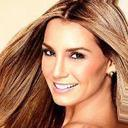

In [ ]:
from IPython.display import Image
Image('000001.jpg')

In [ ]:
data = pd.read_csv("/content/drive/My Drive/CelebA10klabels.csv") # enter the file path on your drive
print(data.shape)
data.head()

(10000, 2)


,5_o_Clock_Shadow,Male
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
### DO NOT CHANGE THE CODE HERE SO AS TO NOT GET ERRORS
# parameters
ImgSz = 64

# Read training images from text file

labels = []
images = []
for j in range(data.shape[0]):
    labels.append(data["Male"][j])
    #Reading Image
    im = image.load_img(data["5_o_Clock_Shadow"][j])  
    im = im.resize((ImgSz, ImgSz))
    x = image.img_to_array(im) 
    #x = x.reshape((1,) + x.shape) 
    x = np.array(x, dtype="float") / 255.0
    images.append(x)
    
lbls = np.array(labels)
imgs = np.array(images)

x_train = imgs[0:8000]
y_train = lbls[0:8000]
x_test = imgs[8000:]
y_test = lbls[8000:]

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 64, 64, 3), (8000,), (2000, 64, 64, 3), (2000,))

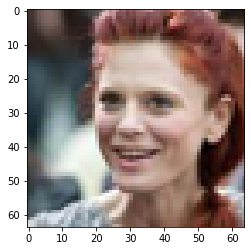

In [ ]:
plt.imshow(x_train[1])

##3) Visualizing/Understanding the dataset

- Display five random images together with their labels

- Display statistics about the dataset, such as its memory usage, distribution of labels, etc.


In [ ]:
print(x_train.astype)
print(x_train[0][0][0][2])
x_train.shape

<built-in method astype of numpy.ndarray object at 0x7fdfb714bf80>
0.7843137254901961


(8000, 64, 64, 3)

-1
1
-1
-1
-1


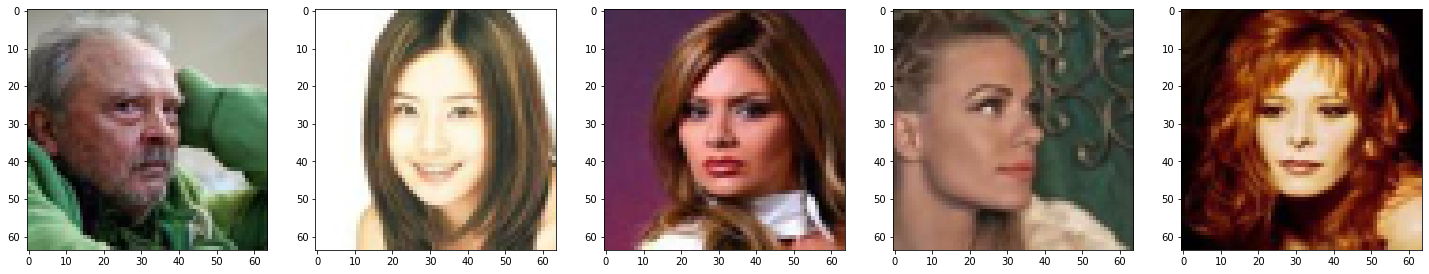

In [ ]:
# plot random 5 images in your dataset with their labels

w = 64
h = 64
fig = plt.figure(figsize=(25, 25))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    a=random.randint(0,8000)
    img = x_train[a]
    print(y_train[a])
     
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

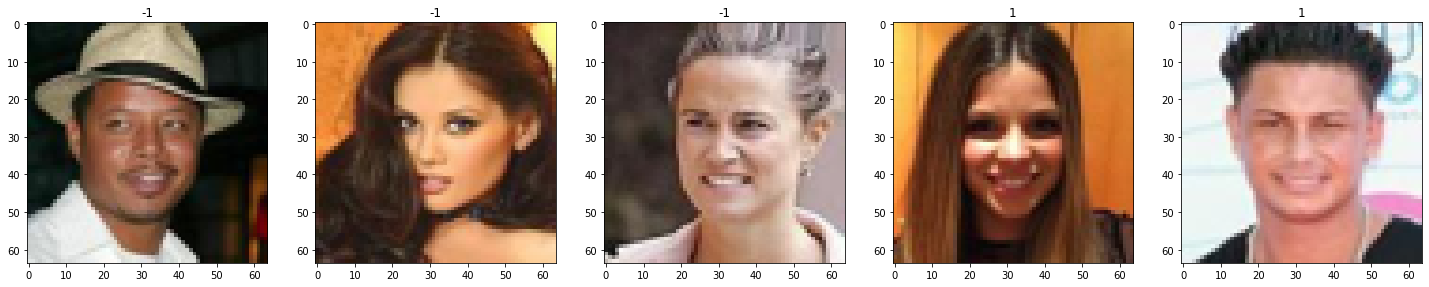

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = 64
h = 64
fig = plt.figure(figsize=(25, 25))
columns = 5
rows = 1

xs = np.linspace(0, 2*np.pi, 60)  
ys = np.abs(np.sin(xs))          

ax = []

for i in range(columns*rows):
    a=random.randint(0,8000)
    img = x_train[a]
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(y_train[a])  # set title
    plt.imshow(img, alpha=1)



plt.show()  # finally, render the plot

In [ ]:
import collections
frequency = collections.Counter(labels)

# printing the frequency
print(dict(frequency))


{1: 4523, -1: 5477}


##4) Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
# Split 80-20
from sklearn.model_selection import KFold, cross_val_score, train_test_split
(train,val,ylabel,vallabel) = train_test_split(x_train,y_train, test_size=0.2)

print("train:",train.shape,"val",val.shape)


train: (6400, 64, 64, 3) val (1600, 64, 64, 3)


In [ ]:
print("train:",ylabel.shape,"val",vallabel.shape)

train: (6400,) val (1600,)


## 5) Train Model with Transfer Learning
* Import a pretrained model from keras. By freezing some of its layer weights and/or adding more layers to its output train the model on the dataset. Metaparameters of the model are to be set to default or your own choice. 

* Train two more models by adding at most 5 hidden layers into a pretrained model of your choice. Choose the best model among all the models you trained so far by reporting their performance, together with their runtimes, number parameters, etc.



In [ ]:
model_vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(64,64,3))
model_vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model, load_model
img_shape = train.shape[1:]
num_classes = 1
print(img_shape)
#Create your own input format
keras_input = Input(shape=img_shape, name = 'image_input')

#Use the generated model
output_vgg_conv = model_vgg_conv(keras_input)

# Add 3 fully-connected layers 
My_vgg = Flatten(name='flatten')(output_vgg_conv)
My_vgg = Dense(256, activation='relu', name='fc1')(My_vgg)
My_vgg = Dense(64, activation='relu', name='fc2')(My_vgg)
My_vgg = Dense(num_classes, activation='softmax', name='predictions')(My_vgg)

#Create your own model 
pretrained_model = Model(inputs=keras_input, outputs=My_vgg)
pretrained_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using own data
history = pretrained_model.fit(train, ylabel,batch_size=64, epochs=5,validation_split = 0.2)

# Evaluate the model
#score = pretrained_model.evaluate(x_test, y_test)
#print("Accuracy on test set: ", score[1])


(64, 64, 3)
80/80 [==============================] - 909s 11s/step - loss: nan - accuracy: 0.1541 - val_loss: nan - val_accuracy: 0.0000e+00


In [ ]:
score = pretrained_model.evaluate(x_test, y_test)

63/63 [==============================] - 82s 1s/step - loss: nan - accuracy: 0.0000e+00


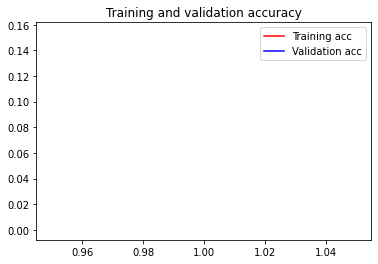

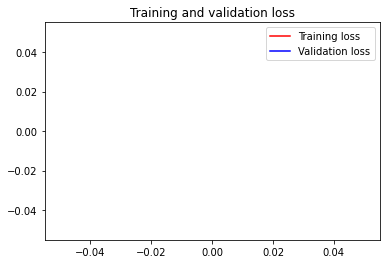

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.resnet50 import preprocess_input

model_resnet_conv = ResNet50(weights='imagenet', include_top=False)
model_resnet_conv.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                          

In [ ]:
from keras.layers import Dropout
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model, load_model
img_shape = x_train.shape[1:]

#Create your own input format
keras_input = Input(shape=img_shape, name = 'image_input')

#Use the generated model 
output_resnet_conv = model_resnet_conv(keras_input)

# Add the fully-connected layers 
resnet = Flatten(name='flatten')(output_resnet_conv)
resnet = Dense(64, activation='relu', name='fc1')(resnet)
resnet = Dense(32, activation='relu', name='fc2')(resnet)
resnet = Dense(16, activation='relu', name='fc3')(resnet)
resnet = Dense(8, activation='relu', name='fc4')(resnet)
resnet = Dense(num_classes, activation='softmax', name='predictions')(resnet)

#Create your own model 
pretrained_model = Model(inputs=keras_input, outputs=resnet)
pretrained_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = pretrained_model.fit(train, ylabel, batch_size=64, epochs=5,validation_split = 0.2)

# Evaluate the model
score = pretrained_model.evaluate(x_test, y_test)
print("Accuracy on test set: ", score[1])

Epoch 1/5
80/80 [==============================] - 792s 10s/step - loss: 0.0000e+00 - accuracy: 0.4363 - val_loss: 0.0000e+00 - val_accuracy: 0.4680
Epoch 2/5
80/80 [==============================] - 729s 9s/step - loss: 0.0000e+00 - accuracy: 0.4363 - val_loss: 0.0000e+00 - val_accuracy: 0.4680
Epoch 3/5
80/80 [==============================] - 752s 9s/step - loss: 0.0000e+00 - accuracy: 0.4363 - val_loss: 0.0000e+00 - val_accuracy: 0.4680
Epoch 4/5
80/80 [==============================] - 740s 9s/step - loss: 0.0000e+00 - accuracy: 0.4363 - val_loss: 0.0000e+00 - val_accuracy: 0.4680
Epoch 5/5
63/63 [==============================] - 27s 417ms/step - loss: 0.0000e+00 - accuracy: 0.4765
Accuracy on test set:  0.476500004529953


## 6) Test your classifier on Test set

- Apply same pre-processing as training data
- Predict the labels of testing data **using the best model that you have selected according to your validation results** and report the accuracy. 

In [ ]:
from sklearn.metrics import accuracy_score
# Load test data




# Evaluate the model

# Evaluate the model
#score = pretrained_model.evaluate(x_test, y_test)
#print("Accuracy on test set: ", score[1])

# Predict




# Report your result







NameError: ignored

##7) Report Your Results

**Notebook should be RUN:** As training and testing may take a long time, we may just look at your notebook results; so make sure **each cell is run**, so outputs are there.

**Report:** Write an **one page summary** of your approach to this problem **below**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what CNN is or what transfer learning is, assuming they are known to people in your research area). 

**Must include statements such as those below:**
**(Remove the text in bullet points, below, and include your own report)**

* Include the **problem definition**: 1-2 lines.

* Talk about your **approach** - the pretrained network and its architecture, changes to the architecture, what is finetuned and for how many epochs...

* Give your **experimental setup** (train/val/test sets, size and how split, samples) and results - along with some analysis of the errors (just take a look at some of your errors and say a few things)

* **Anything else?** You can comment on the speed, computational resources, or anything else that you deem important/interesting. 

* You can add **additional visualization as separate pages **if you want, think of them as appendix, keeping the one-page as abstract/summary.

* Mention **Bonus part** here - in 1-2 paragraphs at most. 
 



##8) (Bonus 5 pts) Train Convolutional neural networks first on development data


* Train a convolutional neural network from scratch (not transfer learning) with number of hidden layers and neurons of **your choice**. Rest of the parameters are to be set to default or your own choice. 

* The aim of this part is to establish an insight for convolutional neural networks and to see why we use them.


In [ ]:
# Train CNNs


# Report your results    

In [ ]:
# ### example loading a pretrained model
# #Loading the model
# VGGmodel = tf.keras.applications.VGG16(include_top = False, weights = "imagenet", input_shape = (ImgSz,ImgSz,3)) # pretrained weigths on imagenet dataset
# VGGmodel.summary() # Print the network

# # Remove last two layers (one hidden layer + Output layer)
# VGGmodel.layers.pop()
# VGGmodel.layers.pop()

# # Freeze the layers except the last 2 layers
# for layer in VGGmodel.layers[:-2]:
#     layer.trainable = False
  
# # Check the status of the layers 
# for layer in VGGmodel.layers:
#     print(layer, layer.trainable)

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
# # Create the model
# from keras.layers import Dense, Dropout, Flatten
# model = tf.keras.Sequential() # your model that will use the pretrained model's parameters
 
# # Add the vgg convolutional base model
# model.add(VGGmodel)
 
# # Add new layers
# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
 
# # Show a summary of the model. Check the number of trainable parameters
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 4096)              2101248   
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4097      
                                                                 
Total params: 16,820,033
Trainable params: 4,465,153
Non-trainable params: 12,354,880
_________________________________________________________________
